In [24]:
# Run this to use from colab environment
#!pip install -q --upgrade git+https://github.com/naomiverkerk/TM10007.git


In [43]:
## Import
from sklearn import model_selection
from sklearn import metrics
from sklearn import feature_selection 
from sklearn import preprocessing
from sklearn import neighbors
from sklearn import svm
from sklearn import decomposition
from load_data import load_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Classifiers and kernels
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report



In [26]:
##Loading Data
data = load_data() 
X = data
X = X.replace(np.inf, np.nan)
Y = data['label']
del X['label']

In [81]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, TCGA-02-0006 to TCGA-HT-A61A
Columns: 724 entries, VOLUME_ET to TGM_T_6
dtypes: float64(718), int64(6)
memory usage: 950.0+ KB
None


In [88]:
## Split
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size = 0.2, random_state = 4, stratify = Y)

In [91]:
print(X_train.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 133 entries, TCGA-HT-7884 to TCGA-02-0037
Columns: 724 entries, VOLUME_ET to TGM_T_6
dtypes: float64(718), int64(6)
memory usage: 753.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, TCGA-DU-5874 to TCGA-02-0027
Columns: 724 entries, VOLUME_ET to TGM_T_6
dtypes: float64(718), int64(6)
memory usage: 192.6+ KB
None


In [94]:

## Features weghalen met teveel missing values
acceptabele_ratio = 0.5
train_size = len(X_train.index)
removal_rate = round(train_size*acceptabele_ratio)

X_train = X_train.dropna(axis=1, thresh=removal_rate)
common_cols = list(set(X_train.columns).intersection(X_test.columns))
X_test = X_test[common_cols]

In [95]:
print(X_train.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 133 entries, TCGA-HT-7884 to TCGA-02-0037
Columns: 704 entries, VOLUME_ET to TGM_T_1
dtypes: float64(698), int64(6)
memory usage: 732.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, TCGA-DU-5874 to TCGA-02-0027
Columns: 704 entries, TEXTURE_GLRLM_ED_T1Gd_RLV to TEXTURE_GLCM_ED_T1Gd_Dissimilarity
dtypes: float64(698), int64(6)
memory usage: 187.3+ KB
None


In [29]:
## Imputation met median
X_train_missing_median = X_train.fillna(X_train.median())
X_train_missing_median = np.nan_to_num(X_train_missing_median)
X_test_missing_median = X_test.fillna(X_test.median())
X_test_missing_median = np.nan_to_num(X_test_missing_median)

In [100]:
print(np.info(X_train_missing_median))
print(np.info(X_test_missing_median))

class:  ndarray
shape:  (133, 704)
strides:  (8, 1064)
itemsize:  8
aligned:  True
contiguous:  False
fortran:  True
data pointer: 0x1c1b387db70
byteorder:  little
byteswap:  False
type: float64
None
class:  ndarray
shape:  (34, 704)
strides:  (8, 272)
itemsize:  8
aligned:  True
contiguous:  False
fortran:  True
data pointer: 0x1c1b3934980
byteorder:  little
byteswap:  False
type: float64
None


In [101]:
print(X_train.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 133 entries, TCGA-HT-7884 to TCGA-02-0037
Columns: 704 entries, VOLUME_ET to TGM_T_1
dtypes: float64(698), int64(6)
memory usage: 732.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, TCGA-DU-5874 to TCGA-02-0027
Columns: 704 entries, TEXTURE_GLRLM_ED_T1Gd_RLV to TEXTURE_GLCM_ED_T1Gd_Dissimilarity
dtypes: float64(698), int64(6)
memory usage: 187.3+ KB
None


In [30]:
## Scaling
scaler = preprocessing.RobustScaler()
scaler.fit(X_train_missing_median)
X_train_scaled = scaler.transform(X_train_missing_median)
X_train_scaled = np.nan_to_num(X_train_scaled)
X_test_scaled = scaler.transform(X_test_missing_median)
X_test_scaled = np.nan_to_num(X_test_scaled)

In [102]:
print(np.info(X_train_scaled))
print(np.info(X_test_scaled))

class:  ndarray
shape:  (133, 704)
strides:  (8, 1064)
itemsize:  8
aligned:  True
contiguous:  False
fortran:  True
data pointer: 0x1c1ad8ba320
byteorder:  little
byteswap:  False
type: float64
None
class:  ndarray
shape:  (34, 704)
strides:  (8, 272)
itemsize:  8
aligned:  True
contiguous:  False
fortran:  True
data pointer: 0x1c1ad2a1c80
byteorder:  little
byteswap:  False
type: float64
None


In [103]:
scaler_y = preprocessing.LabelEncoder()
scaler_y.fit(np.array(Y_train))
Y_train_final = scaler_y.transform(np.array(Y_train))
Y_test_final =  scaler_y.transform(np.array(Y_test))

In [104]:
print(np.info(Y_train_final))
print(np.info(Y_test_final))

class:  ndarray
shape:  (133,)
strides:  (4,)
itemsize:  4
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x1c1adfa2600
byteorder:  little
byteswap:  False
type: int32
None
class:  ndarray
shape:  (34,)
strides:  (4,)
itemsize:  4
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x1c1aab9f7a0
byteorder:  little
byteswap:  False
type: int32
None


In [32]:
## PCA
pca = decomposition.PCA(n_components=0.99, svd_solver= 'full')
pca.fit(X_train_scaled)
X_train_final = pca.transform(X_train_scaled)
X_test_final = pca.transform(X_test_scaled)
explained_variance = np.cumsum(pca.explained_variance_ratio_)


In [105]:
print(np.info(X_train_final))
print(np.info(X_test_final))

class:  ndarray
shape:  (133, 5)
strides:  (40, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x1c1ad5226c0
byteorder:  little
byteswap:  False
type: float64
None
class:  ndarray
shape:  (34, 5)
strides:  (40, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x1c1ad462720
byteorder:  little
byteswap:  False
type: float64
None


In [125]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
cv_20fold = model_selection.StratifiedKFold(n_splits=5)
class_names = ['GBM', 'LGG']
feature_names = list(X_train.columns)
results = []
best_min_samples_split = []

for validation_index, test_index in cv_20fold.split(X_train_final, Y_train_final):

    # Split the data properly
    X_validation = X_train_final[validation_index]
    y_validation = Y_train_final[validation_index]
    
    X_test = X_train_final[test_index]
    y_test = Y_train_final[test_index]

    parameters = {
                    "min_samples_split": list(range(2,40,2)),
                    "min_impurity_decrease": [0,1,2,3,4,5],
    }
    clf = DecisionTreeClassifier()
    cv_10fold = model_selection.StratifiedKFold(n_splits=5)
    grid_search = model_selection.GridSearchCV(clf, parameters, cv=cv_10fold, scoring='roc_auc')
    grid_search.fit(X_validation, y_validation)
    
    # Get resulting classifier
    clf = grid_search.best_estimator_
    print(f'Best classifier for parameter={clf.min_samples_split},{clf.min_impurity_decrease}')
    best_min_samples_split.append(clf.min_samples_split)

    probabilities = clf.predict_proba(X_test)
    scores = probabilities[:, 1]
    
    auc = metrics.roc_auc_score(y_test, scores)
    results.append({
        'auc': auc,
        'k': clf.min_samples_split,
        'set': 'test'
    })
    
    probabilities_validation = clf.predict_proba(X_validation)
    scores_validation = probabilities_validation[:, 1]

    # Get the auc
    auc_validation = metrics.roc_auc_score(y_validation, scores_validation)
    results.append({
        'auc': auc_validation,
        'k': [clf.min_samples_split,clf.min_impurity_decrease]
        'set': 'validation'
    })

plt.figure(dpi=250)
plot_tree(clf, filled=True,
            class_names=class_names,
            feature_names=feature_names,
            );

    

SyntaxError: invalid syntax (Temp/ipykernel_6852/2781978548.py, line 49)

Best classifier for criterion=entropy & min_samples_split=16 & max_features=2 & min_samples_leaf=1
Best classifier for criterion=entropy & min_samples_split=30 & max_features=2 & min_samples_leaf=1
Best classifier for criterion=entropy & min_samples_split=14 & max_features=3 & min_samples_leaf=3
Best classifier for criterion=gini & min_samples_split=18 & max_features=4 & min_samples_leaf=13
Best classifier for criterion=gini & min_samples_split=28 & max_features=3 & min_samples_leaf=3
The optimal criterion=entropy
The optimal min_samples_split=18
The optimal max_features=3
The optimal min_samples_leaf=3


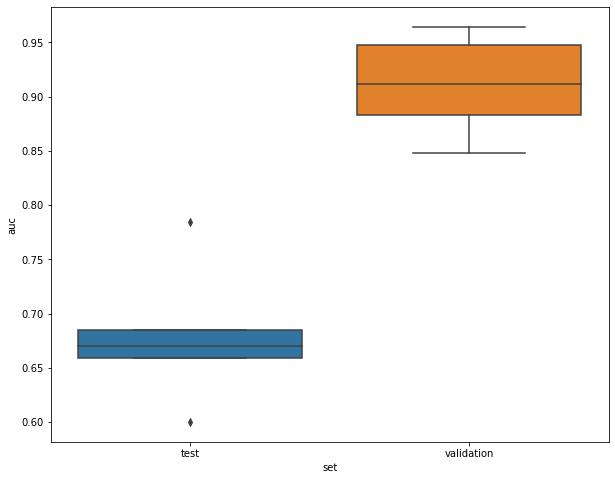

In [247]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
cv_20fold = model_selection.StratifiedKFold(n_splits=5)
class_names = ['GBM', 'LGG']
feature_names = list(X_train.columns)
results = []
best_min_samples_split = []

for validation_index, test_index in cv_20fold.split(X_train_final, Y_train_final):

    # Split the data properly
    X_validation = X_train_final[validation_index]
    y_validation = Y_train_final[validation_index]
    
    X_test = X_train_final[test_index]
    y_test = Y_train_final[test_index]

    parameters = {
            	    "criterion": ['gini', 'entropy'],
                    "min_samples_split": list(range(2,40,2)),
                    # "min_impurity_decrease": [0,1,2,3,4,5],
                    "max_features": [1,2,3,4,5],
                    "min_samples_leaf": list(range(1,20,2)),
    }
    clf = DecisionTreeClassifier()
    cv_10fold = model_selection.StratifiedKFold(n_splits=5)
    grid_search = model_selection.GridSearchCV(clf, parameters, cv=cv_10fold, scoring='roc_auc')
    grid_search.fit(X_validation, y_validation)
    
    # Get resulting classifier
    clf = grid_search.best_estimator_
    print(f'Best classifier for criterion={clf.criterion} & min_samples_split={clf.min_samples_split} & max_features={clf.max_features} & min_samples_leaf={clf.min_samples_leaf}')

    probabilities = clf.predict_proba(X_test)
    scores = probabilities[:, 1]
    
    auc = metrics.roc_auc_score(y_test, scores)
    results.append({
        'auc': auc,
        'criterion': clf.criterion,
        'min_samples_split': clf.min_samples_split,
        'max_features': clf.max_features,
        "min_samples_leaf": clf.min_samples_leaf,
        'set': 'test'
    })
    
    probabilities_validation = clf.predict_proba(X_validation)
    scores_validation = probabilities_validation[:, 1]

    # Get the auc
    auc_validation = metrics.roc_auc_score(y_validation, scores_validation)
    results.append({
        'auc': auc_validation,
        'criterion': clf.criterion,
        'min_samples_split': clf.min_samples_split,
        'max_features': clf.max_features,
        "min_samples_leaf": clf.min_samples_leaf,
        'set': 'validation'
    })

# plt.figure(dpi=250)
# plot_tree(clf, filled=True,
#             class_names=class_names,
#             feature_names=feature_names,
#             );

import seaborn as sns
import statistics

results = pd.DataFrame(results)
sns.boxplot(y='auc', x='set', data=results)

p = list(parameters.keys())
optimal_parameter = []
# print(f"The optimal N={optimal_n}")

parameter_keys = list(parameters.keys())
for item in parameter_keys:
    best_item = [] 
    for i in list(range(0,10,2)):
        best_item.append(results[item][i])

    optimal_parameter.append(statistics.median(best_item))
    print(f"The optimal {item}={optimal_parameter[-1]}")
  
   

In [249]:
pd.DataFrame(results)

,auc,criterion,min_samples_split,max_features,min_samples_leaf,set
0,0.670455,entropy,16,2,1,test
1,0.948030,entropy,16,2,1,validation
2,0.684659,entropy,30,2,1,test
3,0.911820,entropy,30,2,1,validation
4,0.600000,entropy,14,3,3,test
5,0.964472,entropy,14,3,3,validation
6,0.659375,gini,18,4,13,test
7,0.883333,gini,18,4,13,validation
8,0.784375,gini,28,3,3,test
9,0.847619,gini,28,3,3,validation
